# CNN model to recognize face

CNN mimics the way humans see images, by focussing on one portion of the image at a time and scanning the whole image. CNN boils down every image as a vector of numbers, which can be learned by the fully connected Dense layers of ANN

The data contains cropped face images of 16 people divided into Training and testing. We will train the CNN model using the images in the Training folder and then test the model by using the unseen images from the testing folder, to check if the model is able to recognise the face number of the unseen images or not.

In [1]:
TrainingImagePath = "C:\\Users\\ssinh\\Downloads\\upload_3133a8d1-3875-4dab-aff2-1ce0cb579c0c\\Final Training Images"

In [27]:
import cv2
import numpy
import matplotlib.pyplot as plt
import glob2
# Get a list of all the folders in the folder (including subfolders)
folders = glob2.glob(TrainingImagePath + '/**/', recursive=True)

In [28]:
imagenames_list = []
for folder in folders:
    for f in glob2.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images = []        
for image in imagenames_list:
    read_images.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

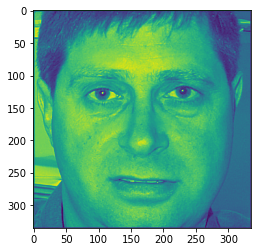

In [29]:
plt.imshow(read_images[0])

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style 
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [4]:
# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator()

In [5]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory( TrainingImagePath, target_size=(64, 64),batch_size=32, class_mode='categorical')

Found 244 images belonging to 16 classes.


In [6]:
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 244 images belonging to 16 classes.


In [7]:
# Printing class labels for each face
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [8]:
TrainClasses=training_set.class_indices

In [9]:
# Storing the face and the numeric tag for future reference
ResultMap = {}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

In [10]:
print("Mapping of Face and its ID",ResultMap) 

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


In [11]:
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  16


In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [13]:
classifier= Sequential()

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. 

In [14]:
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu')) 

In [15]:
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2))) 

In [16]:
classifier.add(Flatten())

In [17]:
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='softmax'))

In [18]:
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Starting the model training
classifier.fit_generator(
                            training_set,
                            steps_per_epoch=30,
                            epochs=10,
                            validation_data=test_set,
                            validation_steps=10 
                        )
 
EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

C:\Users\ssinh\AppData\Local\Temp\ipykernel_756\2931137185.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
30/30 [==============================] - 6s 158ms/step - loss: 141.8409 - accuracy: 0.0861 - val_loss: 3.7063 - val_accuracy: 0.1066
###### Total Time Taken:  0 Minutes ######


Manual Testing on unseen images

In [25]:
import numpy as np
import keras.utils as image
#from tensorflow.keras.utils import load_img, img_to_array
 
ImagePath="C:\\Users\\ssinh\\Downloads\\upload_0937e07d-f32a-4761-bfed-000cbec05b7e\\Final Testing Images\\face3\\3face3.jpg"

test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=classifier.predict(test_image,verbose=0)

print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face4
